# 《python 数据可视化之 matplotlib 实践》

## 划分画布的主要函数

![overview](overview.png)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
matplotlib.__version__

'3.10.0'

In [3]:
%matplotlib inline

### subplot 函数使用方法

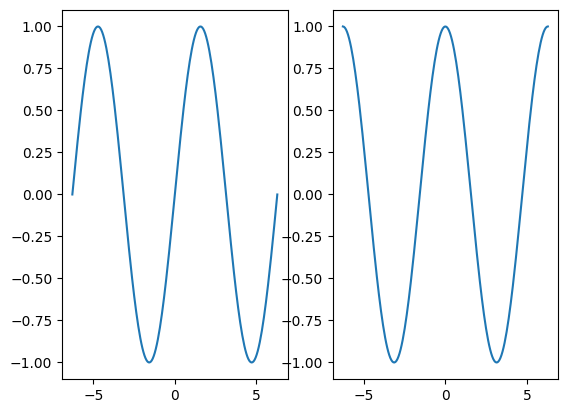

In [4]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

plt.subplot(1, 2, 1)
plt.plot(x, y1)

plt.subplot(122)
plt.plot(x, y2)

plt.show()

### 案例1: 在极坐标轴上绘制折线图

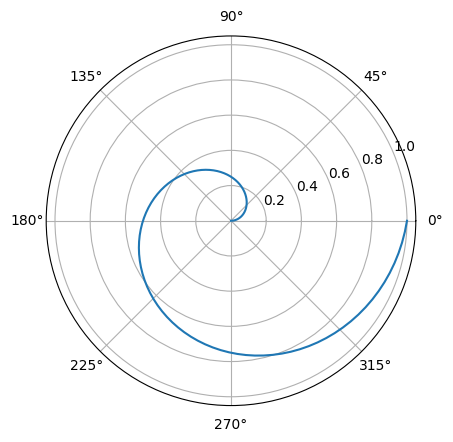

In [5]:
radii = np.linspace(0, 1, 100)
theta = 2 * np.pi * radii
ax = plt.subplot(111, polar=True)  # 指定极坐标形式

ax.plot(theta, radii)
plt.show()

### 案例2: 在极坐标轴上绘制散点图

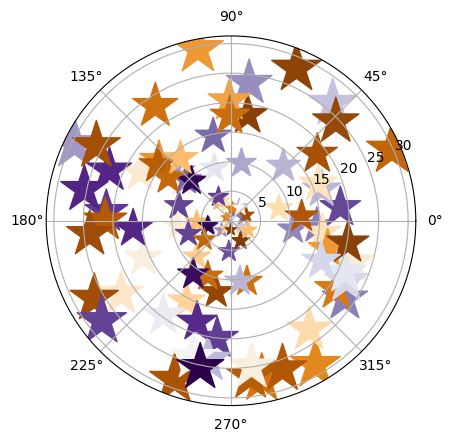

In [6]:
radii = 30 * np.random.rand(100)
theta = 2 * np.pi * np.random.rand(100)
colors = np.random.rand(100)
size = 50 * radii
ax = plt.subplot(111, polar=True)
ax.scatter(theta, radii, s=size, c=colors, cmap=matplotlib.cm.PuOr, marker="*")
plt.show()

### 案例3: 在非等分画布的绘图区域实现图形展示

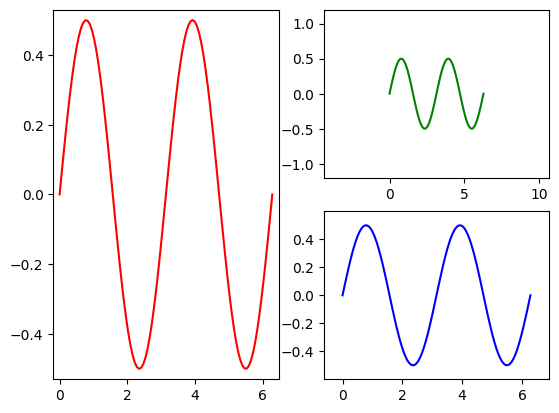

In [7]:
# 非等分画布
x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x) * np.sin(x)

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)  # 画布分成 1 行 2 列
ax1.margins(0.03)  # 设置数据的空白区域
ax1.plot(x, y, color="r")

ax2 = fig.add_subplot(2, 2, 2)  # 画布分成 2 行 2 列
ax2.margins(0.7, 0.7)  # 设置数据的空白区域
ax2.plot(x, y, color="g")

ax3 = fig.add_subplot(2, 2, 4)  # 画布分成 2 行 2 列
ax3.margins(0.1, 0.1)
ax3.plot(x, y, color="b")

plt.show()

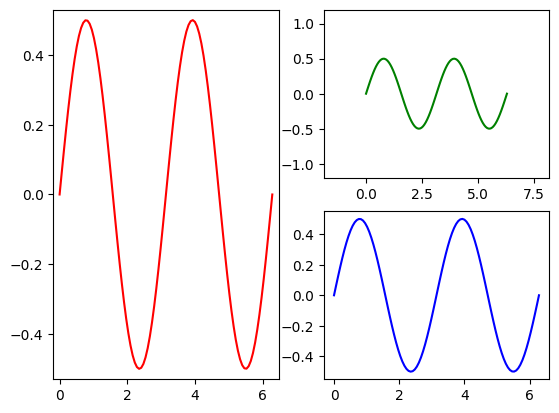

In [8]:
# 也可以直接使用 plt
x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x) * np.sin(x)

plt.subplot(121)
plt.margins(0.03)
plt.plot(x, y, color="r")

plt.subplot(222)
plt.margins(0.3, 0.7)
plt.plot(x, y, color="g")

plt.subplot(224)
plt.plot(x, y, color="b")
plt.show()

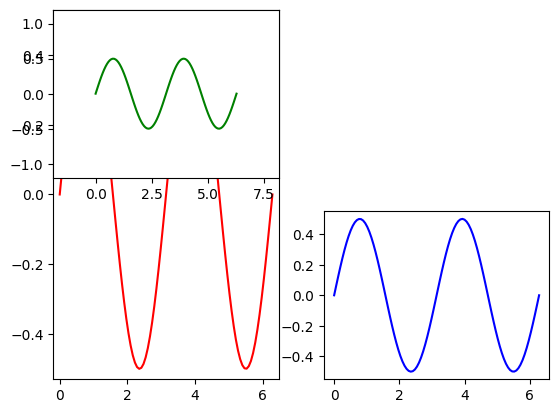

In [9]:
# 也可以直接使用 plt
x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x) * np.sin(x)

plt.subplot(121)
plt.margins(0.03)
plt.plot(x, y, color="r")

plt.subplot(221)  # 画布被覆盖
plt.margins(0.3, 0.7)
plt.plot(x, y, color="g")

plt.subplot(224)
plt.plot(x, y, color="b")
plt.show()

### subplot2grid 函数使用方法

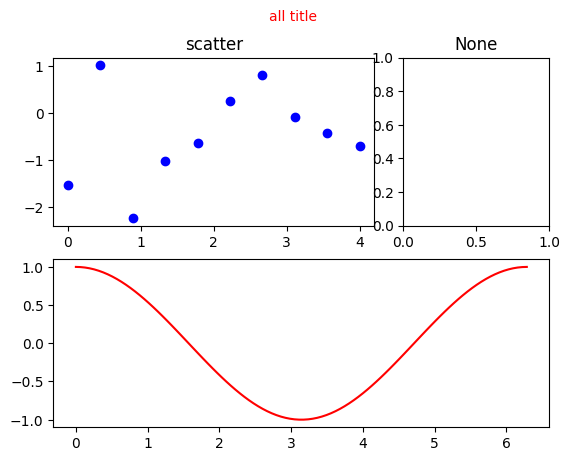

In [10]:
"""
-------
| | | |
-------
| | | |
-------
"""

plt.subplot2grid(
    (2, 3), (0, 0), colspan=2
)  # 整个画布分均为 2 行 3 列, 从 (0, 0) 开始, 占 2 列

x = np.linspace(0, 4, 10)
y = np.random.randn(10)
plt.scatter(x, y, c="b")
plt.title("scatter")

plt.subplot2grid((2, 3), (0, 2))
plt.title("None")

plt.subplot2grid((2, 3), (1, 0), colspan=3)
x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x)
plt.plot(x, y, color="r")

# 整个画布的 title
plt.suptitle("all title", fontsize=10, color="r")

plt.show()

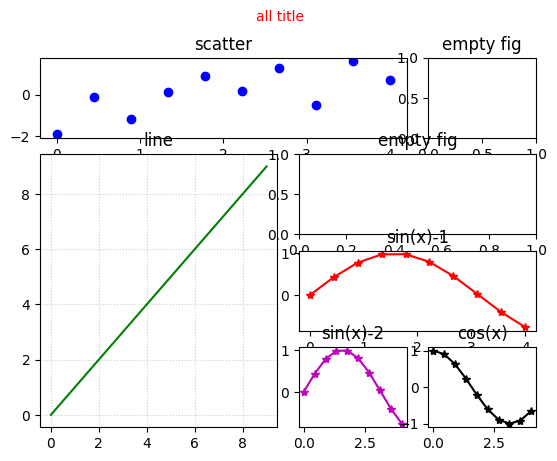

In [11]:
plt.subplot2grid(
    (4, 4), (0, 0), colspan=3
)  # 整个画布分均为 4 行 4 列, 从 (0, 0) 开始, 占 3 列
x = np.linspace(0, 4, 10)
y = np.random.randn(10)
plt.scatter(x, y, c="b")
plt.title("scatter")

plt.subplot2grid(
    (4, 4), (0, 3)
)  # 整个画布分均为 4 行 4 列, 从 (0, 3) 开始, 默认占 1 行 1 列
plt.title("empty fig")

plt.subplot2grid(
    (4, 4), (1, 0), rowspan=3, colspan=2
)  # 整个画布分均为 4 行 4 列, 从 (1, 0) 开始, 占 3 行 2 列
plt.plot(range(10), range(10), color="g")
plt.grid(color="gray", alpha=0.4, linestyle=":")
plt.title("line")

plt.subplot2grid(
    (4, 4), (1, 2), colspan=2
)  # 整个画布分均为 4 行 4 列, 从 (0, 3) 开始, 占 2 列
plt.title("empty fig")

plt.subplot2grid((4, 4), (2, 2), colspan=2)
plt.plot(x, np.sin(x), marker="*", c="r")
plt.title("sin(x)-1")

plt.subplot2grid((4, 4), (3, 2))
plt.plot(x, np.sin(x), marker="*", c="m")
plt.title("sin(x)-2")

plt.subplot2grid((4, 4), (3, 3))
plt.plot(x, np.cos(x), marker="*", c="k")
plt.title("cos(x)")

# 整个画布的 title
plt.suptitle("all title", fontsize=10, color="r")

plt.show()

#### 解决子图标题、坐标轴遮挡问题

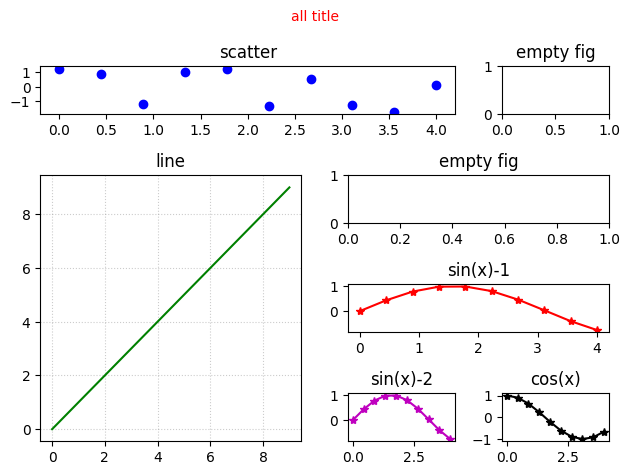

In [12]:
plt.subplot2grid(
    (4, 4), (0, 0), colspan=3
)  # 整个画布分均为 4 行 4 列, 从 (0, 0) 开始, 占 3 列
x = np.linspace(0, 4, 10)
y = np.random.randn(10)
plt.scatter(x, y, c="b")
plt.title("scatter")

plt.subplot2grid(
    (4, 4), (0, 3)
)  # 整个画布分均为 4 行 4 列, 从 (0, 3) 开始, 默认占 1 行 1 列
plt.title("empty fig")

plt.subplot2grid(
    (4, 4), (1, 0), rowspan=3, colspan=2
)  # 整个画布分均为 4 行 4 列, 从 (1, 0) 开始, 占 3 行 2 列
plt.plot(range(10), range(10), color="g")
plt.grid(color="gray", alpha=0.4, linestyle=":")
plt.title("line")

plt.subplot2grid(
    (4, 4), (1, 2), colspan=2
)  # 整个画布分均为 4 行 4 列, 从 (0, 3) 开始, 占 2 列
plt.title("empty fig")

plt.subplot2grid((4, 4), (2, 2), colspan=2)
plt.plot(x, np.sin(x), marker="*", c="r")
plt.title("sin(x)-1")

plt.subplot2grid((4, 4), (3, 2))
plt.plot(x, np.sin(x), marker="*", c="m")
plt.title("sin(x)-2")

plt.subplot2grid((4, 4), (3, 3))
plt.plot(x, np.cos(x), marker="*", c="k")
plt.title("cos(x)")

# 整个画布的 title
plt.suptitle("all title", fontsize=10, color="r")
plt.tight_layout()  # 解决子图标题、坐标轴遮挡问题
plt.show()

```python
matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```
![](./subplots_adjust.png)

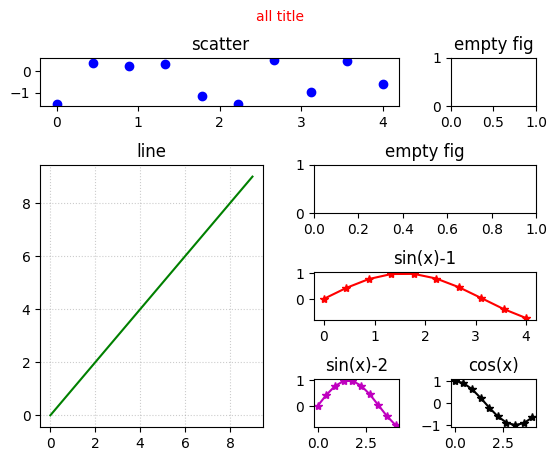

In [13]:
plt.subplot2grid(
    (4, 4), (0, 0), colspan=3
)  # 整个画布分均为 4 行 4 列, 从 (0, 0) 开始, 占 3 列
x = np.linspace(0, 4, 10)
y = np.random.randn(10)
plt.scatter(x, y, c="b")
plt.title("scatter")

plt.subplot2grid(
    (4, 4), (0, 3)
)  # 整个画布分均为 4 行 4 列, 从 (0, 3) 开始, 默认占 1 行 1 列
plt.title("empty fig")

plt.subplot2grid(
    (4, 4), (1, 0), rowspan=3, colspan=2
)  # 整个画布分均为 4 行 4 列, 从 (1, 0) 开始, 占 3 行 2 列
plt.plot(range(10), range(10), color="g")
plt.grid(color="gray", alpha=0.4, linestyle=":")

plt.title("line")

plt.subplot2grid(
    (4, 4), (1, 2), colspan=2
)  # 整个画布分均为 4 行 4 列, 从 (0, 3) 开始, 占 2 列
plt.title("empty fig")

plt.subplot2grid((4, 4), (2, 2), colspan=2)
plt.plot(x, np.sin(x), marker="*", c="r")
plt.title("sin(x)-1")

plt.subplot2grid((4, 4), (3, 2))
plt.plot(x, np.sin(x), marker="*", c="m")
plt.title("sin(x)-2")

plt.subplot2grid((4, 4), (3, 3))
plt.plot(x, np.cos(x), marker="*", c="k")
plt.title("cos(x)")

# 整个画布的 title
plt.suptitle("all title", fontsize=10, color="r")
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=1.2
)
plt.show()

### gridspec 模块中的类 GridSpec 的使用

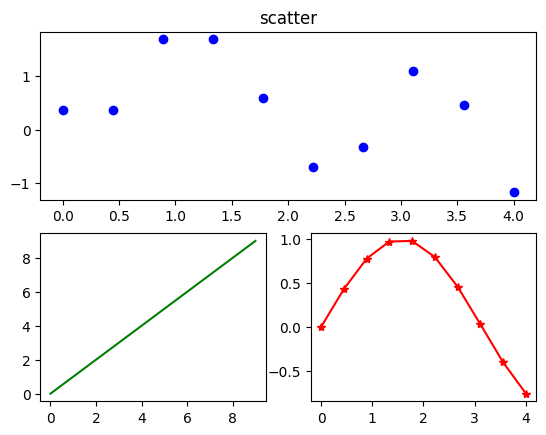

In [14]:
from matplotlib.gridspec import GridSpec

fig = plt.figure()  # Figure size 640x480 with 0 Axes
gs = GridSpec(2, 2)

x = np.linspace(0, 4, 10)
y = np.random.randn(10)
ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(x, y, c="b")
plt.title("scatter")

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(range(10), range(10), color="g")

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(x, np.sin(x), marker="*", c="r")

plt.show()

### 案例1: 创建一张画布和一个 Axis 的绘图模式

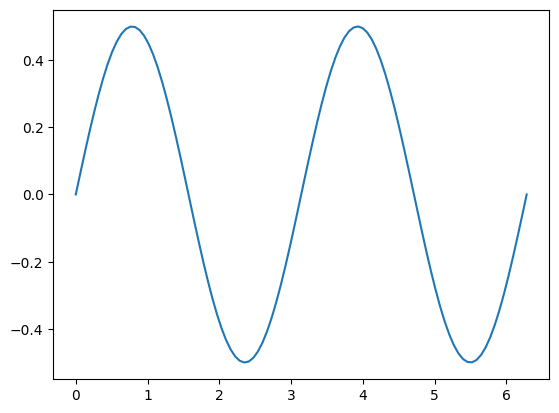

In [15]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x) * np.sin(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

plt.show()

### 案例1: 创建一张画布和二个 Axis 的绘图模式

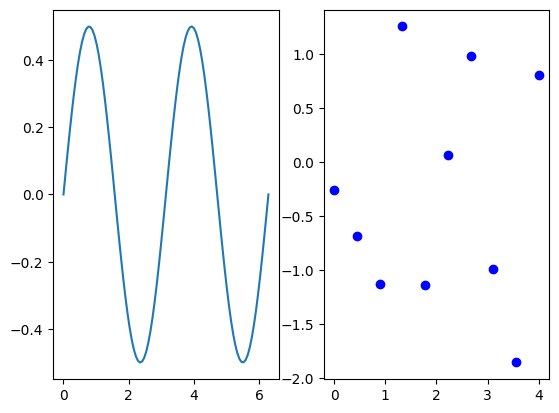

In [16]:
fig, ax = plt.subplots(1, 2)

x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x) * np.sin(x)
ax[0].plot(x, y)

x = np.linspace(0, 4, 10)
y = np.random.randn(10)
ax[1].scatter(x, y, c="b")

plt.show()

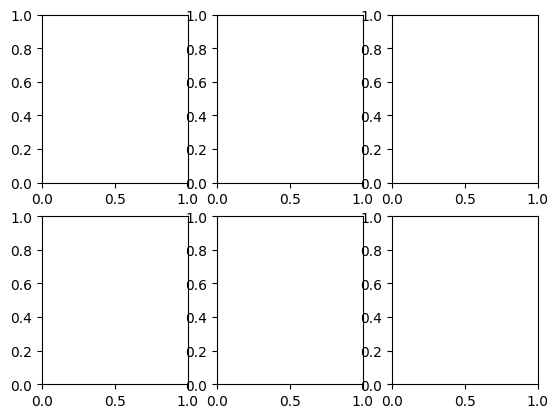

In [17]:
fig, ax = plt.subplots(2, 3)

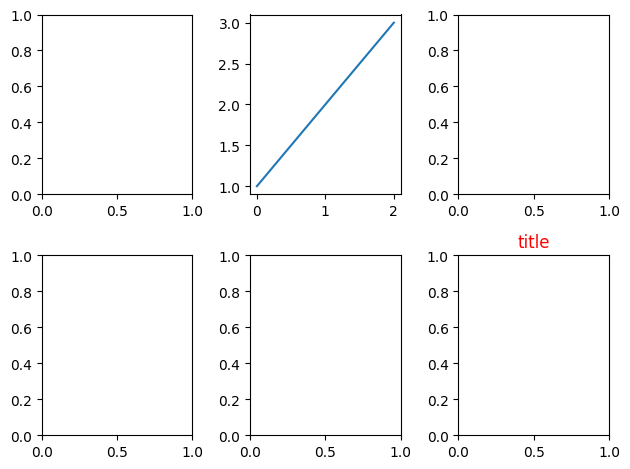

In [18]:
fig, ax = plt.subplots(2, 3)

ax[0][1].plot([1, 2, 3])

ax[1, 2].set_title("title", fontsize=12, color="r")

plt.tight_layout()  # 解决子图标题、坐标轴遮挡问题

plt.show()